In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta
from dateutil import relativedelta
import numpy as np

In [2]:
# Read data
df_census = pd.read_csv('Resources/Census.csv')
df_census

,Year,State,Home Value <$50k (%),"Home Value $50k-$99,999k (%)","Home Value $100k-$149,999k (%)","Home Value $150k-$199,999k (%)","Home Value $200k-$299,999k (%)","Home Value $100k-$299,999 (%)","Home Value $300k-$499,999k (%)",Home Value $500k+ (%),...,"Income $10k-$24,999 (%)","Income $25k-$34,999 (%)","Income $35k-$49,999 (%)","Income $50k-$74,999 (%)","Income $75k-$99,999 (%)","Income $100k-$149,999 (%)",Income $150k+ (%),Median Income ($)(1000X),Median Housing Cost (monthly) ($),Median Real Estate Taxes ($)
0,2010,Alabama,9.1,23.6,20.3,17.8,16.8,NaN,8.7,3.7,...,10.4,8.7,15.5,21.7,15.6,15.6,8.7,61.964,1130,568.0
1,2010,Alaska,2.0,2.9,9.6,15.6,35.2,NaN,26.5,8.1,...,4.0,5.1,8.4,17.8,17.0,27.3,19.1,94.747,1772,3177.0
2,2010,Arizona,4.0,13.4,20.5,19.5,21.4,NaN,14.4,6.8,...,8.8,8.2,14.1,22.6,16.2,17.2,10.2,66.539,1442,1489.0
3,2010,Arkansas,12.0,27.0,23.9,16.2,12.2,NaN,6.4,2.1,...,10.9,10.6,16.8,22.8,15.1,14.1,7.1,59.393,987,703.0
4,2010,California,1.5,3.4,6.0,8.6,17.4,NaN,29.1,34.0,...,5.9,5.2,10.0,17.7,15.9,22.1,21.2,88.444,2242,3284.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,2018,Florida,2.6,6.4,NaN,NaN,NaN,55.1,24.6,NaN,...,7.3,6.4,11.2,18.5,15.6,19.8,18.4,80.372,1471,2151.0
464,2018,Massachusetts,1.0,0.8,NaN,NaN,NaN,26.7,36.2,NaN,...,3.1,3.1,5.5,13.0,13.0,23.6,37.3,121.565,2207,4801.0
465,2018,District of Columbia,0.8,0.6,NaN,NaN,NaN,8.9,27.1,NaN,...,2.8,1.9,2.9,9.0,10.2,20.3,50.6,151.147,2506,3691.0
466,2018,Utah,1.9,1.2,NaN,NaN,NaN,44.5,37.5,NaN,...,3.7,4.3,8.1,19.1,18.3,26.2,19.3,93.060,1531,1788.0


In [3]:
# Filter data to just get information about California
ca_housing_df = df_census[df_census['State'] == 'California']
ca_housing_df

,Year,State,Home Value <$50k (%),"Home Value $50k-$99,999k (%)","Home Value $100k-$149,999k (%)","Home Value $150k-$199,999k (%)","Home Value $200k-$299,999k (%)","Home Value $100k-$299,999 (%)","Home Value $300k-$499,999k (%)",Home Value $500k+ (%),...,"Income $10k-$24,999 (%)","Income $25k-$34,999 (%)","Income $35k-$49,999 (%)","Income $50k-$74,999 (%)","Income $75k-$99,999 (%)","Income $100k-$149,999 (%)",Income $150k+ (%),Median Income ($)(1000X),Median Housing Cost (monthly) ($),Median Real Estate Taxes ($)
4,2010,California,1.5,3.4,6.0,8.6,17.4,NaN,29.1,34.0,...,5.9,5.2,10.0,17.7,15.9,22.1,21.2,88.444,2242,3284.0
56,2011,California,1.6,3.8,7.0,9.0,17.9,NaN,28.5,32.2,...,6.0,5.3,9.8,17.3,15.3,21.6,22.3,89.279,2182,3291.0
108,2012,California,1.7,4.1,7.2,9.3,18.0,NaN,28.5,31.3,...,5.7,5.2,9.6,17.1,15.2,21.8,23.2,91.024,2119,3336.0
160,2013,California,2.8,3.2,5.7,8.0,16.3,NaN,29.2,34.9,...,5.6,5.0,9.1,16.8,14.8,21.7,25.0,93.538,2059,3412.0
212,2014,California,2.7,2.1,4.1,6.2,14.7,NaN,30.0,40.2,...,5.4,5.0,8.5,16.0,14.8,21.8,26.4,96.305,2068,3548.0
264,2015,California,1.1,1.7,NaN,NaN,NaN,22.2,30.5,NaN,...,5.1,4.6,8.2,15.4,14.5,22.2,28.0,100.223,2123,NaN
316,2016,California,1.1,1.4,NaN,NaN,NaN,19.4,29.4,NaN,...,4.7,4.2,7.8,14.8,14.1,21.8,30.6,103.266,2188,NaN
368,2017,California,1.0,1.1,NaN,NaN,NaN,16.6,28.5,NaN,...,4.5,3.9,7.2,13.8,13.6,22.6,32.5,108.609,2269,4174.0
425,2018,California,1.0,1.0,NaN,NaN,NaN,14.1,27.1,NaN,...,4.1,3.7,6.6,13.3,13.2,22.1,34.9,113.027,2345,4479.0


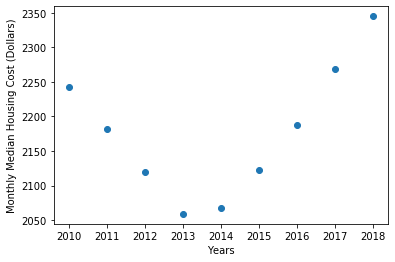

In [4]:
# Visually inspect relationship between Median Housing Cost and Year
x = ca_housing_df['Year']
y = ca_housing_df['Median Housing Cost (monthly) ($)']
plt.scatter(x, y)
plt.xlabel('Years')
plt.ylabel('Monthly Median Housing Cost (Dollars)')
plt.show()

In [5]:
# Set independent variable
X = ca_housing_df.Year.values.reshape(-1,1)
X

array([[2010],
       [2011],
       [2012],
       [2013],
       [2014],
       [2015],
       [2016],
       [2017],
       [2018]])

In [6]:
# Set dependent variable
y1 = ca_housing_df['Median Housing Cost (monthly) ($)']

In [7]:
# Create model and fit
model = LinearRegression()
model.fit(X,y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

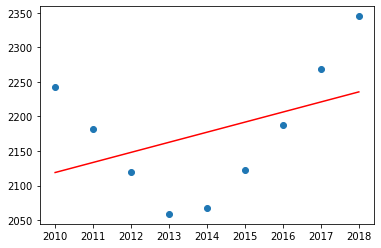

<Figure size 432x288 with 0 Axes>

In [8]:
# Predict using the model
y_pred = model.predict(X)

# Visualize the regression line
plt.scatter(X,y1)
plt.plot(X, y_pred, color='red')
plt.show()
plt.savefig('img/median_housing1.png')

In [9]:
# Find the equation for the regression line
print(model.coef_)
print(model.intercept_)

[14.58333333]
-27193.61111111112


In [10]:
# Predict the cost of housing in 2030
m = model.coef_
b = model.intercept_
m*2030 - b

array([56797.77777778])

In [11]:
# Predict the cost of housing in 2030
m1 = model.coef_
b1 = model.intercept_
print(f'The predicted monthly cost of housing in 2030 is ${m1*2030 - b1}.')

The predicted monthly cost of housing in 2030 is $[56797.77777778].


In [12]:
# Try a linear regression with only 2013 to 2018 data
recent_ca_housing_df = ca_housing_df[ca_housing_df['Year'] >= 2013]
recent_ca_housing_df

,Year,State,Home Value <$50k (%),"Home Value $50k-$99,999k (%)","Home Value $100k-$149,999k (%)","Home Value $150k-$199,999k (%)","Home Value $200k-$299,999k (%)","Home Value $100k-$299,999 (%)","Home Value $300k-$499,999k (%)",Home Value $500k+ (%),...,"Income $10k-$24,999 (%)","Income $25k-$34,999 (%)","Income $35k-$49,999 (%)","Income $50k-$74,999 (%)","Income $75k-$99,999 (%)","Income $100k-$149,999 (%)",Income $150k+ (%),Median Income ($)(1000X),Median Housing Cost (monthly) ($),Median Real Estate Taxes ($)
160,2013,California,2.8,3.2,5.7,8.0,16.3,NaN,29.2,34.9,...,5.6,5.0,9.1,16.8,14.8,21.7,25.0,93.538,2059,3412.0
212,2014,California,2.7,2.1,4.1,6.2,14.7,NaN,30.0,40.2,...,5.4,5.0,8.5,16.0,14.8,21.8,26.4,96.305,2068,3548.0
264,2015,California,1.1,1.7,NaN,NaN,NaN,22.2,30.5,NaN,...,5.1,4.6,8.2,15.4,14.5,22.2,28.0,100.223,2123,NaN
316,2016,California,1.1,1.4,NaN,NaN,NaN,19.4,29.4,NaN,...,4.7,4.2,7.8,14.8,14.1,21.8,30.6,103.266,2188,NaN
368,2017,California,1.0,1.1,NaN,NaN,NaN,16.6,28.5,NaN,...,4.5,3.9,7.2,13.8,13.6,22.6,32.5,108.609,2269,4174.0
425,2018,California,1.0,1.0,NaN,NaN,NaN,14.1,27.1,NaN,...,4.1,3.7,6.6,13.3,13.2,22.1,34.9,113.027,2345,4479.0


In [13]:
# Set independent variable
X2 = recent_ca_housing_df['Year'].values.reshape(-1,1)

# Set dependent variable
y2 = recent_ca_housing_df['Median Housing Cost (monthly) ($)']

# Create model and fit
model = LinearRegression()
model.fit(X2,y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

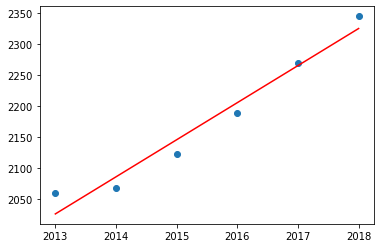

<Figure size 432x288 with 0 Axes>

In [14]:
# Predict with model
y_pred2 = model.predict(X2)

# Visualize the regression line
plt.scatter(X2,y2)
plt.plot(X2, y_pred2, color='red')
plt.show()
plt.savefig('img/median_housing2.png')

In [15]:
# Find the equation for the regression line
print(model.coef_)
print(model.intercept_)

[59.94285714]
-118639.49523809525


In [16]:
# Predict Median Housing Cost in 2030
m2 = model.coef_
b2 = model.intercept_
m2*2030 + b2

array([3044.5047619])

## Create Linear Regression with Zillow data

In [39]:
# Create Zillow CA DataFrame
zillow_ca_df = pd.read_csv('Resources/zillow_data.csv')
zillow_ca_df

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01
0,9,California,1,161327.0,161154.0,161021.0,160947.0,160952.0,161001.0,161175.0,...,553549,554281,555050,556081,557569,559533,561558,563566,566414,569687


In [40]:
# Remove RegionID and SizeRank columns
zillow_ca_df.drop(columns=['RegionID', 'SizeRank'], inplace=True)
zillow_ca_df

,RegionName,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,...,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01
0,California,161327.0,161154.0,161021.0,160947.0,160952.0,161001.0,161175.0,161376.0,161653.0,...,553549,554281,555050,556081,557569,559533,561558,563566,566414,569687


In [41]:
# Convert to tall DataFrame
zillow_ca_df = pd.melt(zillow_ca_df, id_vars=['RegionName'], var_name='Time', value_name='Typical_Home_Value')
zillow_ca_df.head(10)

,RegionName,Time,Typical_Home_Value
0,California,1996-04,161327.0
1,California,1996-05,161154.0
2,California,1996-06,161021.0
3,California,1996-07,160947.0
4,California,1996-08,160952.0
5,California,1996-09,161001.0
6,California,1996-10,161175.0
7,California,1996-11,161376.0
8,California,1996-12,161653.0
9,California,1997-01,161695.0


In [42]:
zillow_ca_df.dtypes

RegionName             object
Time                   object
Typical_Home_Value    float64
dtype: object

In [45]:
# Convert Time to datetime
zillow_ca_df['Time'] = pd.to_datetime(zillow_ca_df['Time'], format='%Y-%m')
zillow_ca_df

,RegionName,Time,Typical_Home_Value
0,California,1996-04-01,161327.0
1,California,1996-05-01,161154.0
2,California,1996-06-01,161021.0
3,California,1996-07-01,160947.0
4,California,1996-08-01,160952.0
...,...,...,...
281,California,2019-09-01,559533.0
282,California,2019-10-01,561558.0
283,California,2019-11-01,563566.0
284,California,2019-12-01,566414.0


In [ ]:
# Create x-axis ticks
dates = 

<function matplotlib.pyplot.show(*args, **kw)>

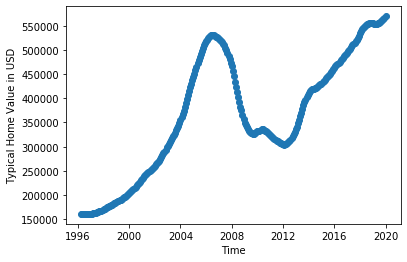

In [46]:
# Visually inspect Zillow data
plt.plot_date(zillow_ca_df.Time, zillow_ca_df.Typical_Home_Value)
plt.xlabel('Time')
plt.ylabel('Typical Home Value in USD')
plt.show

The 2008 recession is visible in terms of home value, but home values have continued on the rise since 2012. Check linear regression to see if this was a "course correction".

In [23]:
# Create Months column that represents the number of months since 1994-04
zillow_ca_df['Months'] = zillow_ca_df.index
zillow_ca_df

,RegionName,Time,Typical_Home_Value,Months
0,California,1996-04-01,161327.0,0
1,California,1996-05-01,161154.0,1
2,California,1996-06-01,161021.0,2
3,California,1996-07-01,160947.0,3
4,California,1996-08-01,160952.0,4
...,...,...,...,...
281,California,2019-09-01,559533.0,281
282,California,2019-10-01,561558.0,282
283,California,2019-11-01,563566.0,283
284,California,2019-12-01,566414.0,284


In [24]:
zillow_ca_df.dtypes

RegionName                    object
Time                  datetime64[ns]
Typical_Home_Value           float64
Months                         int64
dtype: object

In [25]:
# Set independent variable
X3 = zillow_ca_df['Months'].values.reshape(-1,1)

# Set dependent variable
y3 = zillow_ca_df['Typical_Home_Value']

# Create model and fit
z_model = LinearRegression()
z_model.fit(X3,y3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

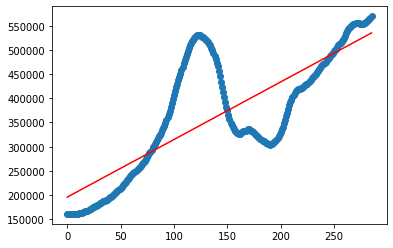

<Figure size 432x288 with 0 Axes>

In [26]:
# Predict with Zillow model
y_predz = z_model.predict(X3)

# Visualize the regression line
plt.scatter(X3,y3)
plt.plot(X3, y_predz, color='red')
plt.show()
plt.savefig('img/median_home_value1.png')

In [27]:
# Find the equation for the regression line
print(z_model.coef_)
print(z_model.intercept_)

[1191.63336997]
195615.22380058962


In [28]:
# Predict home value in 2030 by adding 120 months to 2020-01
m3 = z_model.coef_
b3 = z_model.intercept_
x = 285 + 120
m3 * x + b3

array([678226.73863749])

In [29]:
# Check Census Median Home Value data
X4 = ca_housing_df['Year'].values.reshape(-1,1)
y4 = ca_housing_df['Median Home Value ($)(1000X)']

# Create model and fit
model = LinearRegression()
model.fit(X4,y4)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

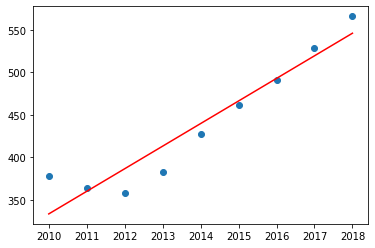

<Figure size 432x288 with 0 Axes>

In [30]:
# Predict with model
y_pred4 = model.predict(X4)

# Visualize the regression line
plt.scatter(X4,y4)
plt.plot(X4, y_pred4, color='red')
plt.show()
plt.savefig('img/median_home_value2.png')

In [31]:
# Find the equation for the regression line
print(model.coef_)
print(model.intercept_)

[26.57666667]
-53085.57333333334


In [32]:
# Predict Median Home Value in 2030
m4 = model.coef_
b4 = model.intercept_
(m4*2030 + b4) * 1000

array([865060.])

In [33]:
# Predict the cost of housing in 2030
m1 = model.coef_
b1 = model.intercept_
print(f'The predicted monthly cost of housing in 2030 is ${m1*2030 - b1}.')

The predicted monthly cost of housing in 2030 is $[107036.20666667].
